## Electricity Demand Estimation For Leading Electricity Distributor

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

## IMPORT DATA

In [2]:
data=pd.read_csv("Electricity Consumption.csv")
data

,DATE,Electricty_Consumption_in_TW
0,1/1/1973,35.9728
1,2/1/1973,36.1334
2,3/1/1973,35.0625
3,4/1/1973,33.8416
4,5/1/1973,33.5107
...,...,...
556,5/1/2019,97.5860
557,6/1/2019,110.8580
558,7/1/2019,122.1014
559,8/1/2019,121.7765


## DATA PREPROCESSING

In [3]:
# changing object to date format
data["DATE"]=pd.to_datetime(data["DATE"])

In [4]:
#missing value
data.isna().sum()

DATE                            0
Electricty_Consumption_in_TW    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   DATE                          561 non-null    datetime64[ns]
 1   Electricty_Consumption_in_TW  561 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.9 KB


## VISUALISATION

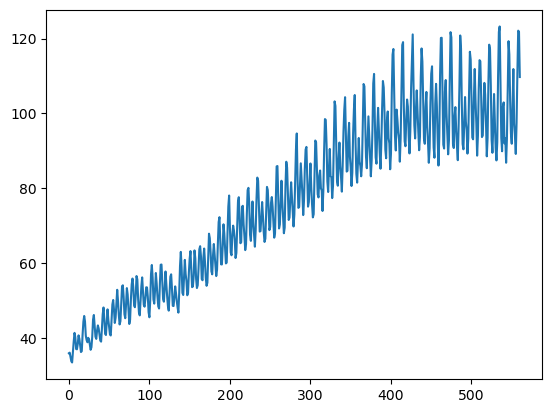

In [6]:
plt.plot(data["Electricty_Consumption_in_TW"])

In [7]:
data["year"]=data["DATE"].dt.year

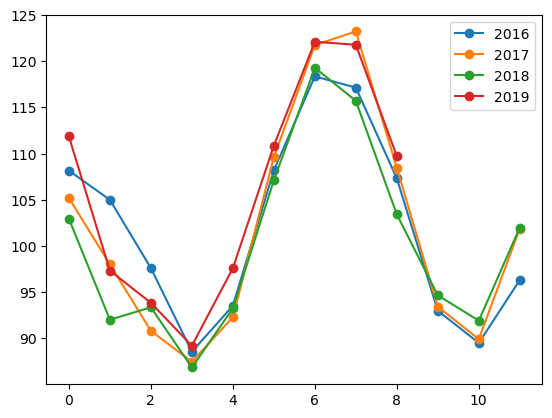

In [8]:
plt.plot(data[data["year"]==2016]["Electricty_Consumption_in_TW"].values,label="2016",marker="o")
plt.plot(data[data["year"]==2017]["Electricty_Consumption_in_TW"].values,label="2017",marker="o")
plt.plot(data[data["year"]==2018]["Electricty_Consumption_in_TW"].values,label="2018",marker="o")
plt.plot(data[data["year"]==2019]["Electricty_Consumption_in_TW"].values,label="2019",marker="o")
plt.legend()
plt.show()

## IMPORT ADFULLER FOR FINDING STATIONARY OR NOT

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
datapoints=adfuller(data["Electricty_Consumption_in_TW"])
labels=['test_parameters',"p-value","lags_used","dataobs"]
datapoints
d=dict(zip(labels,datapoints[:4]))
d

{'test_parameters': -1.740593372983259,
 'p-value': 0.4103281604468605,
 'lags_used': 15,
 'dataobs': 545}

In [11]:
if(d["p-value"]>0.05):
    print("Accept the null hypothesis")
    print("The time series is non-stationary")
else:
    print("Reject the null hypothesis")
    print("The time series is stationary")

Accept the null hypothesis
The time series is non-stationary


In [12]:
#USING LAG TO MAKE SATIONARY DATA
data["diff_3"]=data["Electricty_Consumption_in_TW"] - data["Electricty_Consumption_in_TW"].shift(1)
data

,DATE,Electricty_Consumption_in_TW,year,diff_3
0,1973-01-01,35.9728,1973,NaN
1,1973-02-01,36.1334,1973,0.1606
2,1973-03-01,35.0625,1973,-1.0709
3,1973-04-01,33.8416,1973,-1.2209
4,1973-05-01,33.5107,1973,-0.3309
...,...,...,...,...
556,2019-05-01,97.5860,2019,8.3987
557,2019-06-01,110.8580,2019,13.2720
558,2019-07-01,122.1014,2019,11.2434
559,2019-08-01,121.7765,2019,-0.3249


In [13]:
datapoints=adfuller(data["diff_3"].dropna())
labels=['test_parameters',"p-value","lags_used","dataobs"]
datapoints
d=dict(zip(labels,datapoints[:4]))
d

{'test_parameters': -7.941665363981145,
 'p-value': 3.301343802152202e-12,
 'lags_used': 14,
 'dataobs': 545}

In [14]:
if(d["p-value"]>0.05):
    print("Accept the null hypothesis")
    print("The time series is non-stationary")
else:
    print("Reject the null hypothesis")
    print("The time series is stationary")

Reject the null hypothesis
The time series is stationary


## PLOTING ACF AND PACF

In [15]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [16]:
import statsmodels.api as sn

In [17]:
data=data[["DATE","Electricty_Consumption_in_TW"]]

In [18]:
data.set_index(data["DATE"],inplace=True)

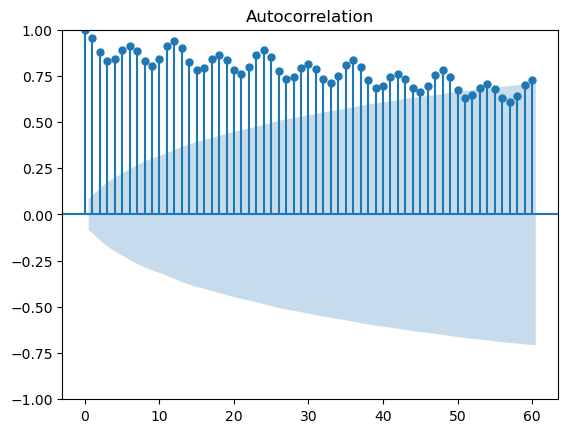

In [19]:
fig=sn.graphics.tsa.plot_acf(data["Electricty_Consumption_in_TW"],lags=60)

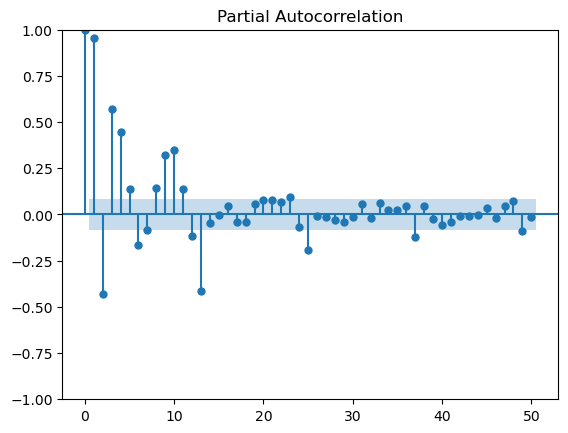

In [20]:
fig=sn.graphics.tsa.plot_pacf(data["Electricty_Consumption_in_TW"],lags=50)

## SEASONAL DECOMPOSITION 

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

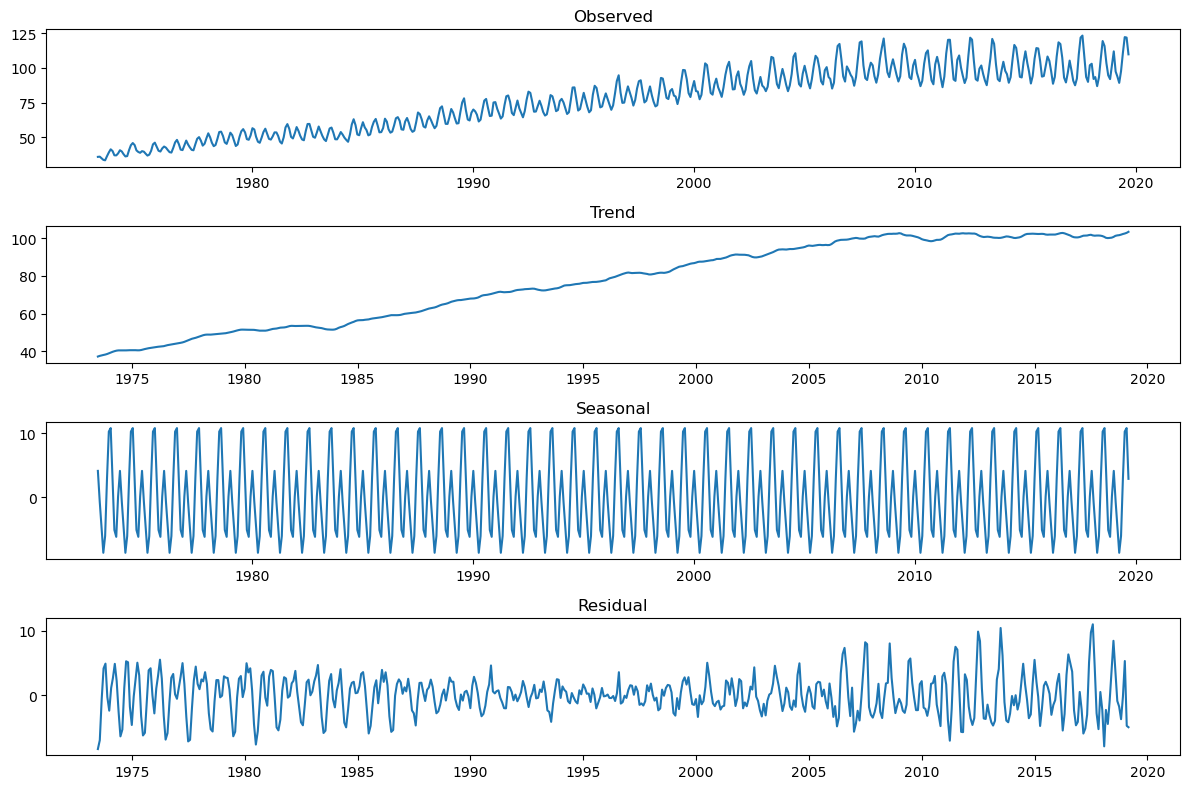

In [22]:
result = seasonal_decompose(data["Electricty_Consumption_in_TW"], model='additive')

plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(result.observed)
plt.title('Observed')
plt.subplot(4, 1, 2)
plt.plot(result.trend)
plt.title('Trend')
plt.subplot(4, 1, 3)
plt.plot(result.seasonal)
plt.title('Seasonal')
plt.subplot(4, 1, 4)
plt.plot(result.resid)
plt.title('Residual')
plt.tight_layout()
plt.show()

## ARIMA MODEL

In [23]:
from statsmodels.tsa.arima.model import ARIMA

In [24]:
model=ARIMA(data["Electricty_Consumption_in_TW"],order=(10,0,4))
arima_model=model.fit()
print(arima_model.summary())

C:\Users\aazar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\aazar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\aazar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                     
Dep. Variable:     Electricty_Consumption_in_TW   No. Observations:                  561
Model:                          ARIMA(10, 0, 4)   Log Likelihood               -1290.824
Date:                          Wed, 01 May 2024   AIC                           2613.649
Time:                                  16:27:04   BIC                           2682.924
Sample:                              01-01-1973   HQIC                          2640.697
                                   - 09-01-2019                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         76.6798      9.277      8.266      0.000      58.497      94.862
ar.L1          0.4704      0.037     12.712      0.

C:\Users\aazar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [25]:
pred=pd.Series(arima_model.predict(start="1973-01-01",end="2019-09-01"))
pred

1973-01-01     76.679765
1973-02-01     45.274035
1973-03-01     50.232166
1973-04-01     43.499971
1973-05-01     35.354483
                 ...    
2019-05-01     99.669888
2019-06-01    108.644829
2019-07-01    120.882957
2019-08-01    116.782277
2019-09-01    105.309372
Freq: MS, Name: predicted_mean, Length: 561, dtype: float64

In [26]:
new_pred_data=pd.concat([data,pred],axis=1)
new_pred_data

,DATE,Electricty_Consumption_in_TW,predicted_mean
1973-01-01,1973-01-01,35.9728,76.679765
1973-02-01,1973-02-01,36.1334,45.274035
1973-03-01,1973-03-01,35.0625,50.232166
1973-04-01,1973-04-01,33.8416,43.499971
1973-05-01,1973-05-01,33.5107,35.354483
...,...,...,...
2019-05-01,2019-05-01,97.5860,99.669888
2019-06-01,2019-06-01,110.8580,108.644829
2019-07-01,2019-07-01,122.1014,120.882957
2019-08-01,2019-08-01,121.7765,116.782277


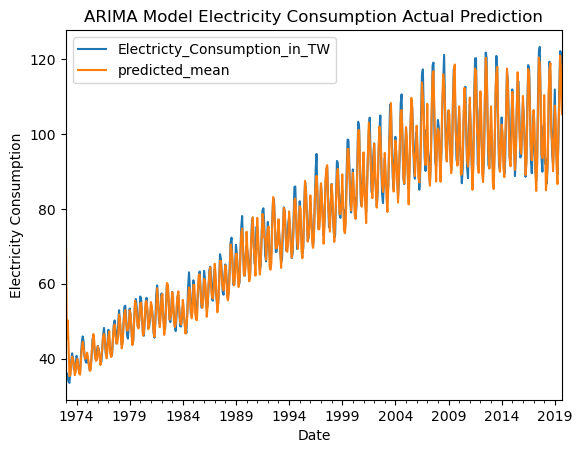

In [27]:
new_pred_data[["Electricty_Consumption_in_TW","predicted_mean"]].plot()
plt.xlabel('Date')
plt.ylabel('Electricity Consumption')
plt.title('ARIMA Model Electricity Consumption Actual Prediction')
plt.legend()
plt.show()

In [28]:
forecasted = arima_model.get_forecast(steps=24)
forecasted=forecasted.predicted_mean
forecasted

2019-10-01     99.741388
2019-11-01    100.047301
2019-12-01    104.131086
2020-01-01    111.877810
2020-02-01    103.916772
2020-03-01     97.863892
2020-04-01     89.318640
2020-05-01     97.883458
2020-06-01    110.660105
2020-07-01    120.695980
2020-08-01    119.368273
2020-09-01    107.821258
2020-10-01     98.264764
2020-11-01     98.974744
2020-12-01    104.103839
2021-01-01    111.782324
2021-02-01    104.104030
2021-03-01     98.007684
2021-04-01     89.796318
2021-05-01     98.084458
2021-06-01    110.030250
2021-07-01    119.504521
2021-08-01    117.346736
2021-09-01    105.924253
Freq: MS, Name: predicted_mean, dtype: float64

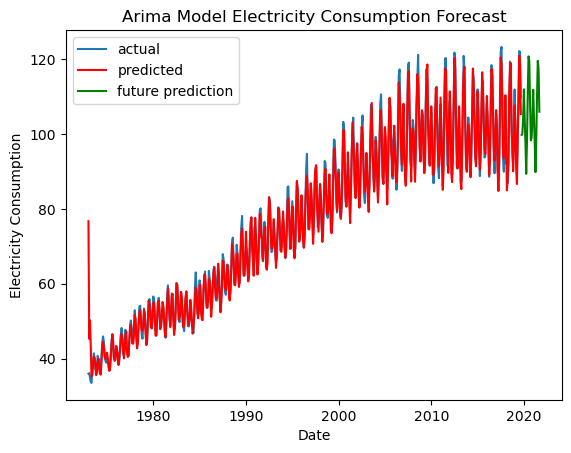

In [29]:
plt.plot(new_pred_data["Electricty_Consumption_in_TW"],label="actual")
plt.plot(new_pred_data["predicted_mean"],color="red",label="predicted")
plt.plot(forecasted,color="Green",label="future prediction")
plt.xlabel('Date')
plt.ylabel('Electricity Consumption')
plt.title('Arima Model Electricity Consumption Forecast')
plt.legend()
plt.show()

In [30]:
 mape =np.mean(np.abs(new_pred_data.Electricty_Consumption_in_TW-new_pred_data.predicted_mean)/np.abs(new_pred_data.Electricty_Consumption_in_TW)) #MAPE

In [31]:
print(f"mape for ARIMA Model:{mape}")

mape for ARIMA Model:0.026169111580330227


In [32]:
rmse = np.mean((new_pred_data.Electricty_Consumption_in_TW-new_pred_data.predicted_mean)**2)**.5 #RMSE

In [33]:
print(f"rmse for ARIMA Model:{rmse}")

rmse for ARIMA Model:3.034390724955409


In [34]:
rmspe = np.sqrt(np.mean(((new_pred_data.Electricty_Consumption_in_TW - new_pred_data.predicted_mean) / new_pred_data.Electricty_Consumption_in_TW) ** 2)) * 100

In [35]:
print(f"rmspe for ARIMA Model:{round(rmspe,2)}%")

rmspe for ARIMA Model:6.06%


## SARIMA MODEL

In [36]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [37]:
sarima_model = SARIMAX(data["Electricty_Consumption_in_TW"], order=(10, 0, 4), seasonal_order=(1, 0, 1, 12))
sarima_result = sarima_model.fit()
print(sarima_result.summary())

C:\Users\aazar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\aazar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\aazar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                       SARIMAX Results                                       
Dep. Variable:          Electricty_Consumption_in_TW   No. Observations:                  561
Model:             SARIMAX(10, 0, 4)x(1, 0, [1], 12)   Log Likelihood               -1132.776
Date:                               Wed, 01 May 2024   AIC                           2299.553
Time:                                       16:27:11   BIC                           2373.158
Sample:                                   01-01-1973   HQIC                          2328.291
                                        - 09-01-2019                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0338      0.200     -0.169      0.866      -0.426       0.359
ar.L2      

In [38]:
pred_sarima=pd.Series(sarima_result.predict(start="1973-01-01",end="2019-09-01"))
pred_sarima

1973-01-01      0.000000
1973-02-01     35.906423
1973-03-01     36.064719
1973-04-01     35.011727
1973-05-01     34.008163
                 ...    
2019-05-01     94.862528
2019-06-01    110.302384
2019-07-01    120.820491
2019-08-01    120.631021
2019-09-01    108.130399
Freq: MS, Name: predicted_mean, Length: 561, dtype: float64

In [39]:
new_sarima_data=pd.concat([data,pred_sarima],axis=1)
new_sarima_data

,DATE,Electricty_Consumption_in_TW,predicted_mean
1973-01-01,1973-01-01,35.9728,0.000000
1973-02-01,1973-02-01,36.1334,35.906423
1973-03-01,1973-03-01,35.0625,36.064719
1973-04-01,1973-04-01,33.8416,35.011727
1973-05-01,1973-05-01,33.5107,34.008163
...,...,...,...
2019-05-01,2019-05-01,97.5860,94.862528
2019-06-01,2019-06-01,110.8580,110.302384
2019-07-01,2019-07-01,122.1014,120.820491
2019-08-01,2019-08-01,121.7765,120.631021


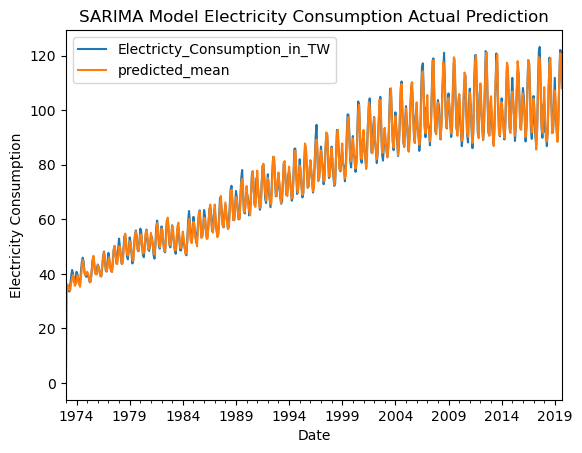

In [40]:
new_sarima_data[["Electricty_Consumption_in_TW","predicted_mean"]].plot()
plt.xlabel('Date')
plt.ylabel('Electricity Consumption')
plt.title('SARIMA Model Electricity Consumption Actual Prediction')
plt.legend()
plt.show()

In [41]:
forcast_sarima=sarima_result.forecast(steps=24)
forcast_sarima

2019-10-01     96.004854
2019-11-01     94.624511
2019-12-01    102.983170
2020-01-01    108.795047
2020-02-01     99.952721
2020-03-01     95.797468
2020-04-01     89.463486
2020-05-01     97.021829
2020-06-01    110.065681
2020-07-01    120.903311
2020-08-01    120.654506
2020-09-01    108.078531
2020-10-01     95.616764
2020-11-01     94.275954
2020-12-01    102.888651
2021-01-01    109.117312
2021-02-01    100.048407
2021-03-01     95.861610
2021-04-01     90.010833
2021-05-01     97.119988
2021-06-01    110.313656
2021-07-01    121.332341
2021-08-01    120.797591
2021-09-01    108.370835
Freq: MS, Name: predicted_mean, dtype: float64

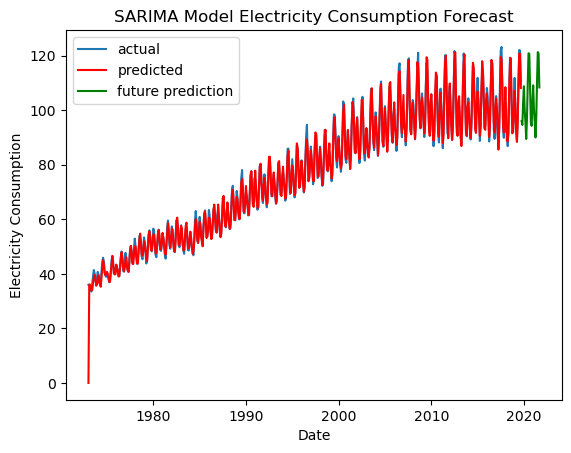

In [42]:
plt.plot(new_sarima_data["Electricty_Consumption_in_TW"],label="actual")
plt.plot(new_sarima_data["predicted_mean"],color="red",label="predicted")
plt.plot(forcast_sarima,color="Green",label="future prediction")
plt.xlabel('Date')
plt.ylabel('Electricity Consumption')
plt.title('SARIMA Model Electricity Consumption Forecast')
plt.legend()
plt.show()

In [43]:
 mape_sarima =np.mean(np.abs(new_sarima_data.Electricty_Consumption_in_TW-new_sarima_data.predicted_mean)/np.abs(new_sarima_data.Electricty_Consumption_in_TW)) #MAPE

In [44]:
print(f"mape for SARIMA Model:{mape_sarima}")

mape for SARIMA Model:0.019351093569108625


In [45]:
rmse_sarima = np.mean((new_sarima_data.Electricty_Consumption_in_TW-new_sarima_data.predicted_mean)**2)**.5 #RMSE

In [46]:
print(f"rmse for SARIMA Model:{rmse_sarima}")

rmse for SARIMA Model:2.3359673757376007


In [47]:
rmspe_sarima = np.sqrt(np.mean(((new_sarima_data.Electricty_Consumption_in_TW - new_sarima_data.predicted_mean) / new_sarima_data.Electricty_Consumption_in_TW) ** 2)) * 100

In [48]:
print(f"rmspe for SARIMA Model:{round(rmspe_sarima,2)}%")

rmspe for SARIMA Model:4.78%


## ETS MODEL

In [49]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [50]:
ets_model = ExponentialSmoothing(data["Electricty_Consumption_in_TW"], trend="add", seasonal="add", seasonal_periods=12)
ets_fit = ets_model.fit()
print(ets_fit.summary())

                           ExponentialSmoothing Model Results                           
Dep. Variable:     Electricty_Consumption_in_TW   No. Observations:                  561
Model:                     ExponentialSmoothing   SSE                           2137.742
Optimized:                                 True   AIC                            782.497
Trend:                                 Additive   BIC                            851.773
Seasonal:                              Additive   AICC                           783.759
Seasonal Periods:                            12   Date:                 Wed, 01 May 2024
Box-Cox:                                  False   Time:                         16:27:12
Box-Cox Coeff.:                            None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.509

C:\Users\aazar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [51]:
pred_ets=pd.Series(ets_fit.predict(start="1973-01-01",end="2019-09-01"))
pred_ets

1973-01-01     36.461948
1973-02-01     34.772675
1973-03-01     33.407544
1973-04-01     32.725547
1973-05-01     33.559658
                 ...    
2019-05-01     94.219313
2019-06-01    110.384519
2019-07-01    121.724899
2019-08-01    120.211535
2019-09-01    108.894113
Freq: MS, Length: 561, dtype: float64

In [52]:
new_etc_data=pd.concat([data,pred_ets],axis=1)
new_etc_data.columns=["DATE","Electricty_Consumption_in_TW","predicted_etc"]
new_etc_data

,DATE,Electricty_Consumption_in_TW,predicted_etc
1973-01-01,1973-01-01,35.9728,36.461948
1973-02-01,1973-02-01,36.1334,34.772675
1973-03-01,1973-03-01,35.0625,33.407544
1973-04-01,1973-04-01,33.8416,32.725547
1973-05-01,1973-05-01,33.5107,33.559658
...,...,...,...
2019-05-01,2019-05-01,97.5860,94.219313
2019-06-01,2019-06-01,110.8580,110.384519
2019-07-01,2019-07-01,122.1014,121.724899
2019-08-01,2019-08-01,121.7765,120.211535


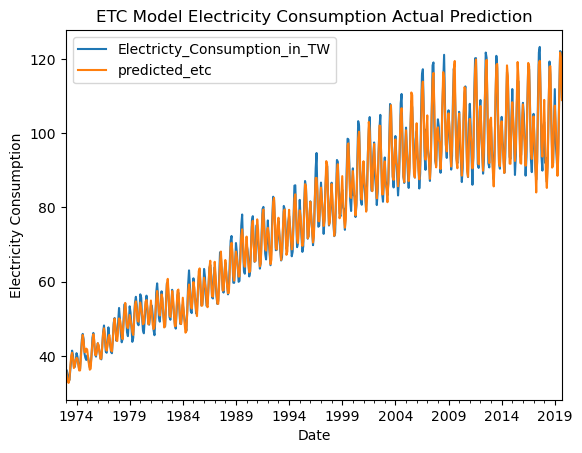

In [53]:
new_etc_data[["Electricty_Consumption_in_TW","predicted_etc"]].plot()
plt.xlabel('Date')
plt.ylabel('Electricity Consumption')
plt.title('ETC Model Electricity Consumption Actual Prediction')
plt.legend()
plt.show()

In [54]:
forecast = ets_fit.forecast(steps=24)
forecast

2019-10-01     97.674951
2019-11-01     95.153684
2019-12-01    105.335406
2020-01-01    112.139570
2020-02-01    101.999625
2020-03-01     99.609353
2020-04-01     93.946945
2020-05-01    100.146841
2020-06-01    113.701158
2020-07-01    124.770373
2020-08-01    123.433516
2020-09-01    110.834259
2020-10-01     99.195031
2020-11-01     96.673764
2020-12-01    106.855486
2021-01-01    113.659650
2021-02-01    103.519705
2021-03-01    101.129433
2021-04-01     95.467026
2021-05-01    101.666921
2021-06-01    115.221238
2021-07-01    126.290454
2021-08-01    124.953596
2021-09-01    112.354339
Freq: MS, dtype: float64

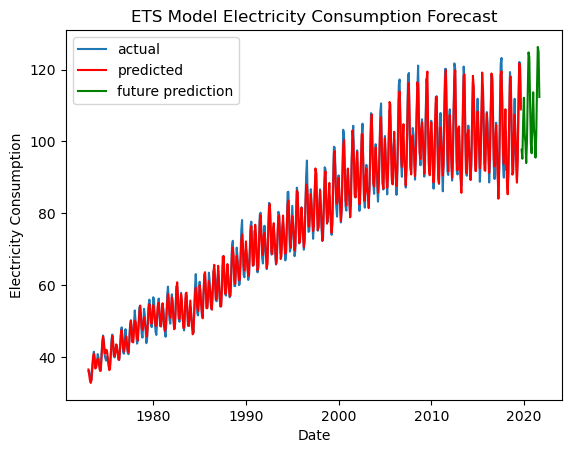

In [55]:
plt.plot(new_etc_data["Electricty_Consumption_in_TW"],label="actual")
plt.plot(new_etc_data["predicted_etc"],color="red",label="predicted")
plt.plot(forecast,color="Green",label="future prediction")
plt.xlabel('Date')
plt.ylabel('Electricity Consumption')
plt.title('ETS Model Electricity Consumption Forecast')
plt.legend()
plt.show()

In [56]:
mape_etc =np.mean(np.abs(new_etc_data.Electricty_Consumption_in_TW-new_etc_data.predicted_etc)/np.abs(new_etc_data.Electricty_Consumption_in_TW)) #MAPE

In [57]:
print(f"mape for ETS Model:{mape_etc}")

mape for ETS Model:0.019357102218144906


In [58]:
rmse_etc = np.mean((new_etc_data.Electricty_Consumption_in_TW-new_etc_data.predicted_etc)**2)**.5 #RMSE

In [59]:
print(f"rmse for ETS Model:{rmse_etc}")

rmse for ETS Model:1.9520739193443


In [60]:
rmspe_etc = np.sqrt(np.mean(((new_etc_data.Electricty_Consumption_in_TW - new_etc_data.predicted_etc) / new_etc_data.Electricty_Consumption_in_TW) ** 2)) * 100

In [61]:
print(f"rmspe for ETS Model:{round(rmspe_etc,2)}%")

rmspe for ETS Model:2.42%


## ACTUAL TABLE PREDICTION

In [62]:
pred_table=pd.merge(new_pred_data,new_sarima_data,on="Electricty_Consumption_in_TW",how="inner")
pred_table=pd.merge(pred_table,new_etc_data,on="Electricty_Consumption_in_TW",how="inner")
pred_table=pred_table[["DATE","Electricty_Consumption_in_TW","predicted_mean_x","predicted_mean_y","predicted_etc"]]
pred_table.columns=["date","actual_consumption","arima_model","sarima_model","ets_model"]
pred_table

,date,actual_consumption,arima_model,sarima_model,ets_model
0,1973-01-01,35.9728,76.679765,0.000000,36.461948
1,1973-02-01,36.1334,45.274035,35.906423,34.772675
2,1973-03-01,35.0625,50.232166,36.064719,33.407544
3,1973-04-01,33.8416,43.499971,35.011727,32.725547
4,1973-05-01,33.5107,35.354483,34.008163,33.559658
...,...,...,...,...,...
556,2019-05-01,97.5860,99.669888,94.862528,94.219313
557,2019-06-01,110.8580,108.644829,110.302384,110.384519
558,2019-07-01,122.1014,120.882957,120.820491,121.724899
559,2019-08-01,121.7765,116.782277,120.631021,120.211535


##  demand estimation for next 1-2 years on monthly basis

In [63]:
forecast=forecast.reset_index()

In [64]:
forecasted=forecasted.reset_index()

In [65]:
forcast_sarima=forcast_sarima.reset_index()

In [66]:
pred_future=pd.merge(forecast,forecasted,on="index",how="inner")
pred_future=pd.merge(pred_future,forcast_sarima,on="index",how="inner")
pred_future=pred_future[["index",0,"predicted_mean_x","predicted_mean_y"]]
pred_future.columns=["date","ets_model","arima_model","sarima_model"]
pred_future

,date,ets_model,arima_model,sarima_model
0,2019-10-01,97.674951,99.741388,96.004854
1,2019-11-01,95.153684,100.047301,94.624511
2,2019-12-01,105.335406,104.131086,102.983170
3,2020-01-01,112.139570,111.877810,108.795047
4,2020-02-01,101.999625,103.916772,99.952721
5,2020-03-01,99.609353,97.863892,95.797468
6,2020-04-01,93.946945,89.318640,89.463486
7,2020-05-01,100.146841,97.883458,97.021829
8,2020-06-01,113.701158,110.660105,110.065681
9,2020-07-01,124.770373,120.695980,120.903311


## ACCURACY METRICS

In [67]:
print(f"ARIMA = mape:{mape},rmse:{rmse},rmspe:{round(rmspe,2)}%")
print(f"SARIMA = mape:{mape_sarima},rmse:{rmse_sarima},rmspe:{round(rmspe_sarima,2)}%")
print(f"ETS Model = mape:{mape_etc},rmse:{rmse_etc},rmspe:{round(rmspe_etc,2)}%")

ARIMA = mape:0.026169111580330227,rmse:3.034390724955409,rmspe:6.06%
SARIMA = mape:0.019351093569108625,rmse:2.3359673757376007,rmspe:4.78%
ETS Model = mape:0.019357102218144906,rmse:1.9520739193443,rmspe:2.42%


##  model selected and reason for selection


ARIMA Model:
--
MAPE: 2.62%
RMSE: 3.03
RMSPE: 6.06%

SARIMA Model:
---
MAPE: 1.94%
RMSE: 2.34
RMSPE: 4.78%

 It seems that SARIMA outperforms ARIMA in terms of MAPE, RMSE, and RMSPE. Therefore, if we are considering only these two models, SARIMA is the better choice for demand estimation.
 
 but we have another ETS model
 
 ETS Model:
---
MAPE: 1.94%
RMSE: 1.95
RMSPE: 2.42%

Upon reviewing the performance metrics provided, It appears that the ETS model performs even better than both ARIMA and SARIMA in terms of MAPE, RMSE, and RMSPE. Therefore, if we consider all three models, the ETS model emerges as the best choice for demand estimation based on the provided evaluation metrics.


## Thank you